Load: concentrated force at x=L
BCs: cantilever
BCs output: cantilever


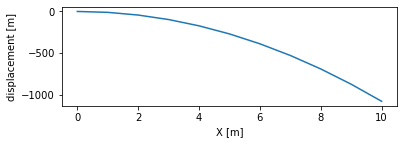

In [35]:
import matplotlib.pyplot as plt
import numpy as np

E=5e6 #Young's modulus
rho=7800. #density
L=10. #total length
b=1.00 #beam depth
h=1.00 #beam height
A=b*h #beam cross sectional area
I=b*h**3/12 #beam moment of inertia
N=10 #number of elements 
Nnodes=N+1 #number of nodes
ell=L/N #length of beam element
Nmodes=12 #number of modes to keep
mass=rho*L*A #total mass
Irot=1/12*mass*L**2 #rotary inertia
x=np.arange(0,ell+L,ell)


K_e=E*I/ell**3*np.array([[12, 6*ell, -12, 6*ell],
 [6*ell, 4*ell**2, -6*ell, 2*ell**2],
 [-12, -6*ell, 12, -6*ell], #x2
 [6*ell, 2*ell**2, -6*ell, 4*ell**2]]) #theta2


bcs = 'cantilever' # 'clamped-clamped' # 'clamped-sliding' # simplysupported # 'cantilever' Input boundary conditions here

loadcase = 'pointforce' #'pointforce' # 'pointmoment' # 'unifromdistribmoment' Input load case here
 # 'uniformpres' # 'concmomenteachnode'


K=np.zeros((2*(N+1),2*(N+1))) 
# M=zeros(2*(N+1),2*(N+1))


for i in range(1,N+1):
    K[(2*(i-1)+1-1):(2*(i-1)+4), (2*(i-1)+1-1):(2*(i-1)+4)]=K[(2*(i-1)+1-1):(2*(i-1)+4)][:,(2*(i-1)+1-1):(2*(i-1)+4)]+K_e

f=np.zeros((2*Nnodes,1))

if loadcase == 'pointforce':
    print('Load: concentrated force at x=L')
    #load: concentrated force on end of beam
    f[Nnodes*2-1]=-9e6 
elif loadcase == 'pointmoment':
    print('Load: concentrated moment at x=L/2')
    #load: concentrated moment on center of beam
    f[Nnodes]=1 
elif loadcase == 'uniformdistribmoment':
    print('Load: uniformly distributed moment')
    #load: uniform distributed moment on entire beam
    m=1.0
    m_el=np.zeros((4,1))
    m_el[:,0] = np.array([-m,0,m,0])
    for i in range(1,N+1):
        f[2*(i-1)+1-1:2*(i-1)+4]=f[2*(i-1)+1-1:2*(i-1)+4]+m_el
elif loadcase == 'concmomenteachnode':
    print('Load: Concentrated moment on each node')
    #load: concentrated moment on each node
    f[1:2*Nnodes:2]=1 
elif loadcase == 'uniformpres':
    print('Uniform pressure')
    #load: uniform distributed load on entire beam
    q=-rho*A*9.81
    q_el=np.zeros((4,1))
    q_el[:,0] = np.array([q*ell/2, q*ell**2/12, q*ell/2, -q*ell**2/12])
    for i in range(1,N+1):
        f[2*(i-1)+1-1:2*(i-1)+4]=f[2*(i-1)+1-1:2*(i-1)+4]+q_el
else:
    print('Unknown loading')

if bcs == 'clamped-clamped':
    print('BCs: clamped-clamped')
    #clamped-clamped beam BCs
    K=np.delete(K,[2*Nnodes-2,2*Nnodes-1],0) #K[1:2,:]=[] 
    K=np.delete(K,[2*Nnodes-2,2*Nnodes-1],1) #K[:,1:2]=[] 
    f=np.delete(f,[2*Nnodes-2,2*Nnodes-1]) #f[1:2]=[] 
    K=np.delete(K,[0,1],0) #K[1:2,:]=[] 
    K=np.delete(K,[0,1],1) #K[:,1:2]=[] 
    f=np.delete(f,[0,1]) #f[1:2]=[]

elif bcs == 'simplysupported':
    print('BCs: simply supported')
    #simply supported beam BCs
    K=np.delete(K,[2*Nnodes-2],0) #K[1:2,:]=[] 
    K=np.delete(K,[2*Nnodes-2],1) #K[:,1:2]=[] 
    f=np.delete(f,[2*Nnodes-2]) #f[1:2]=[] 
    K=np.delete(K,[0],0) #K[1:2,:]=[] 
    K=np.delete(K,[0],1) #K[1:2,:]=[] 
    f=np.delete(f,[0]) #f[1:2]=[] 

elif bcs == 'cantilever':
    print('BCs: cantilever')
    #cantilever beam BCs
    K=np.delete(K,[0,1],0) #K[1:2,:]=[] 
    K=np.delete(K,[0,1],1) #K[:,1:2]=[] 
    f=np.delete(f,[0,1]) #f[1:2]=[] 

elif bcs == 'clamped-sliding':
    print('BCs: clamped-sliding')
    #clamped-sliding beam BCs
    K=np.delete(K,[2*Nnodes-1],0) #K[1:2,:]=[] 
    K=np.delete(K,[2*Nnodes-1],1) #K[:,1:2]=[] 
    f=np.delete(f,[2*Nnodes-1]) #f[1:2]=[] 
    K=np.delete(K,[0,1],0) #K[1:2,:]=[] 
    K=np.delete(K,[0,1],1) #K[:,1:2]=[] 
    f=np.delete(f,[0,1]) #f[1:2]=[] 
else:
    print('Unknown boundary conditions.')

dx_vec=np.linalg.solve(K,f)

if bcs == 'clamped-clamped':
    print('BCs output: clamped-clamped')
    #clamped-clamped
    dx=np.hstack([0., dx_vec[0:2*Nnodes-5:2], 0.]) 
    dtheta=np.hstack([0., dx_vec[1:2*Nnodes-4:2], 0.])
elif bcs == 'simplysupported':
    print('BCs output: simply-supported')
    #simply-supported
    dx=np.hstack([0., dx_vec[1:2*Nnodes-4:2], 0.])
    dtheta=np.hstack([dx_vec[0:2*Nnodes-3:2], dx_vec[2*Nnodes-3]])
elif bcs == 'cantilever':
    print('BCs output: cantilever')
    #cantilever
    dx=np.hstack([0., dx_vec[0:2*Nnodes-2:2]])
    dtheta=np.hstack([0., dx_vec[1:2*Nnodes-1:2]])
elif bcs == 'clamped-sliding':
    print('BCs output: clamped-sliding')
    #clamped-sliding beam BCs
    dx=np.hstack([0., dx_vec[0:2*Nnodes-3:2]])
    dtheta=np.hstack([0., dx_vec[1:2*Nnodes-4:2], 0.])
else:
    print('Output: Unknown boundary conditions.')

plt.figure(1)
plt.subplot(211)
plt.plot(x,dx)
plt.xlabel('X [m]')
plt.ylabel('displacement [m]')
# plt.title(['BCs: ' bcs 'Load case: ' loadcase])
plt.show()

# plt.subplot(212)
# plt.plot(x,dtheta) 
# plt.ylabel('slope [radians]')
